### Mouse data ( 1st step of data cleaning: reshape column)

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
current_dir=os.getcwd()

In [3]:
import import_ipynb
from Data import MOUSE

importing Jupyter notebook from Data.ipynb


In [4]:
mouse=MOUSE(f'{current_dir}/UCSC_data_Mouse/mouse_genes_020324_NCBI.csv')

In [5]:
mouse.col_preprocess()

In [6]:
mouse.drop()

In [7]:
mouse.df.rename(columns={'name2':'gene_name'},inplace=True)
### Replace the column name

In [8]:
mouse_gene_df=mouse.select(['chrom','exonStarts','exonCount',
                        'gene_name','name'])

In [9]:
mouse_gene_df['exonStarts']=mouse_gene_df['exonStarts'].str.replace(r',\Z','',regex=True)
### remove the comma by the end of the column prior to splitting the data

In [10]:
mouse_gene_df['exonStarts']=mouse_gene_df['exonStarts'].str.split(",")

In [11]:
mouse_gene_df=mouse_gene_df.explode('exonStarts')

In [12]:
mouse_gene_df=mouse_gene_df.reset_index(drop=True)

In [13]:
mouse_gene_df_2=mouse.select(['exonEnds','exonCount','cdsStart','cdsEnd','strand','gene_name','name'])

In [14]:
mouse_gene_df_2['exonEnds']=mouse_gene_df_2['exonEnds'].str.replace(r',\Z','',regex=True)
### remove the comma at the end of column

In [15]:
mouse_gene_df_2['exonEnds']=mouse_gene_df_2['exonEnds'].str.split(",")

In [16]:
mouse_gene_df_2=mouse_gene_df_2.explode('exonEnds')

In [17]:
mouse_gene_df_2.head(50).reset_index(drop=True)

,exonEnds,exonCount,cdsStart,cdsEnd,strand,gene_name,name
0,134203590,2,134202950,134234733,-,Adora1,NM_001291928.1
1,134234856,2,134202950,134234733,-,Adora1,NM_001291928.1
2,134203590,2,134202950,134234355,-,Adora1,NM_001008533.3
3,134235457,2,134202950,134234355,-,Adora1,NM_001008533.3
4,134203590,3,134202950,134234355,-,Adora1,NM_001282945.1
5,134234446,3,134202950,134234355,-,Adora1,NM_001282945.1
6,134235457,3,134202950,134234355,-,Adora1,NM_001282945.1
7,134203590,3,134202950,134234355,-,Adora1,NM_001039510.2
8,134234412,3,134202950,134234355,-,Adora1,NM_001039510.2
9,134235457,3,134202950,134234355,-,Adora1,NM_001039510.2


In [18]:
mouse_gene_df_2.rename(columns={'gene_name':'Name','exonCount':'exon_count','name':'ID'},inplace=True)

In [19]:
mouse_gene_df_2 = mouse_gene_df_2.reset_index(drop=True)

### Concatanate the dataframe (Reshape the dataframe) and remove all miRNA dataset

In [20]:
finalized_mouse_gene_df=pd.concat([mouse_gene_df,mouse_gene_df_2], axis=1)#### This file contains all mouse genes!

In [21]:
finalized_mouse_gene_df.shape

(1385818, 12)

In [22]:
finalized_mouse_gene_df.columns

Index(['chrom', 'exonStarts', 'exonCount', 'gene_name', 'name', 'exonEnds',
       'exon_count', 'cdsStart', 'cdsEnd', 'strand', 'Name', 'ID'],
      dtype='object')

In [23]:
finalized_mouse_gene_df.drop(columns=['exon_count','exonCount','gene_name','name'],inplace=True)

In [24]:
finalized_mouse_gene_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'Name', 'ID'],
      dtype='object')

In [25]:
####This regex only extract microRNA but not lncRNA.
mouse_p=r'^Mir\d+(-\d+)*$|^Mir\d+[a-z](-\d+)*$|^Mir\d+[a-z]([a-z]|\d)*$(?<!hg)$|^Mirlet\d[a-z]-*\d*$(?<!hg)$'

In [26]:
mouse_all_genes_no_miR_df=finalized_mouse_gene_df.loc[~finalized_mouse_gene_df['Name'].str.contains(
mouse_p, flags=re.I,regex=True)]####Remove all miR from the data. So this file has all mouse genes except for miRNAs

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14923/1856401095.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_all_genes_no_miR_df=finalized_mouse_gene_df.loc[~finalized_mouse_gene_df['Name'].str.contains(


In [27]:
mouse_all_genes_no_miR_df.shape

(1384536, 8)

In [28]:
mouse_all_genes_no_miR_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'Name', 'ID'],
      dtype='object')

In [79]:
### save the file
mouse_all_genes_no_miR_df.to_csv(f'{current_dir}/Mouse_bash_script/mouse_all_genes_no_miR_df_NCBI.tsv',sep='\t',index=False)

### Extract miRNA data

In [29]:
##extract mouse miRs
mouse_df_miR=finalized_mouse_gene_df.loc[finalized_mouse_gene_df['Name'].str.contains(mouse_p,flags=re.I,regex=True)]

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14923/3488575663.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_df_miR=finalized_mouse_gene_df.loc[finalized_mouse_gene_df['Name'].str.contains(mouse_p,flags=re.I,regex=True)]


In [30]:
mouse_df_miR.shape ### this dataset do not have lncRNA (e.g. miR-210HG) It has only miRNAs

(1282, 8)

In [31]:
mouse_df_miR.head(5)

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,Name,ID
56853,chr1,12425985,12426106,12426106,12426106,+,Mir6341,NR_105759.1
57475,chr1,20679009,20679082,20679082,20679082,+,Mir206,NR_029593.1
57476,chr1,20682768,20682887,20682887,20682887,+,Mir133b,NR_029902.1
57636,chr1,23272268,23272339,23272339,23272339,+,Mir30a,NR_029533.1
57637,chr1,23291700,23291784,23291784,23291784,+,Mir30c-2,NR_029717.1


In [80]:
###save the file for microRNA dataset
mouse_df_miR.to_csv(f'{current_dir}/Mouse_bash_script/df_mousemiR_NCBI.tsv',sep="\t",index=False)

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Mouse

In [32]:

columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [33]:
mouse_exonicmiR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_exonic_miR_NCBI.tsv', sep='\t', header=None, names=columns)

In [34]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,Name=mmu-mir-29b-2,+,Alias=MI0000712
1,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037050,195037074,miRNA,Name=mmu-miR-29b-2-5p,+,Alias=MIMAT0017063
2,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037091,195037113,miRNA,Name=mmu-miR-29b-3p,+,Alias=MIMAT0000127
3,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,Name=mmu-mir-29c,+,Alias=MI0000577
4,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037562,195037583,miRNA,Name=mmu-miR-29c-5p,+,Alias=MIMAT0004632


In [35]:
mouse_exonicmiR_df=mouse_exonicmiR_df.loc[mouse_exonicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [36]:
mouse_exonicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [37]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand
0,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,Name=mmu-mir-29b-2,+
3,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,Name=mmu-mir-29c,+
6,chr1,20682712,20682958,20682958,20682958,+,Lincmd1,NR_131249.1,chr1,20682769,20682887,miRNA_primary_transcript,Name=mmu-mir-133b,+
9,chr1,86351980,86352127,86352127,86352127,-,Gm24148,NR_106184.1,chr1,86351981,86352127,miRNA_primary_transcript,Name=mmu-mir-3535,-
11,chr1,134946233,134946299,134946299,134946299,-,Gm51265,NR_162775.1,chr1,134946234,134946299,miRNA_primary_transcript,Name=mmu-mir-5104b,-


In [38]:
#Change string values in the columns of exonic miR files

# Reset the index
mouse_exonicmiR_df = mouse_exonicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
new_df_2 = pd.DataFrame({"miR_name": mouse_exonicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
mouse_exonicmiR_df.insert(12,"miR_name", new_df_2['miR_name'])
# mouse_exonicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [39]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_Name,miR_strand
0,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,mmu-mir-29b-2,Name=mmu-mir-29b-2,+
1,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,mmu-mir-29c,Name=mmu-mir-29c,+
2,chr1,20682712,20682958,20682958,20682958,+,Lincmd1,NR_131249.1,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,Name=mmu-mir-133b,+
3,chr1,86351980,86352127,86352127,86352127,-,Gm24148,NR_106184.1,chr1,86351981,86352127,miRNA_primary_transcript,mmu-mir-3535,Name=mmu-mir-3535,-
4,chr1,134946233,134946299,134946299,134946299,-,Gm51265,NR_162775.1,chr1,134946234,134946299,miRNA_primary_transcript,mmu-mir-5104b,Name=mmu-mir-5104b,-


### 7. Use Gene_func file to add additional columns to the dataframe (7th step).
This new column will have a new column called gene type. Bascially this new dataframe will tell you if the host gene is a protein or non-coding RNA.

In [40]:
from Gene_func import Gene_type

importing Jupyter notebook from Gene_func.ipynb


In [41]:
Gene_type(mouse_exonicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [42]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_Name,miR_strand,gene_type
0,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,mmu-mir-29b-2,Name=mmu-mir-29b-2,+,non-coding gene
1,chr1,195033822,195037908,195037908,195037908,+,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,mmu-mir-29c,Name=mmu-mir-29c,+,non-coding gene
2,chr1,20682712,20682958,20682958,20682958,+,Lincmd1,NR_131249.1,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,Name=mmu-mir-133b,+,non-coding gene
3,chr1,86351980,86352127,86352127,86352127,-,Gm24148,NR_106184.1,chr1,86351981,86352127,miRNA_primary_transcript,mmu-mir-3535,Name=mmu-mir-3535,-,non-coding gene
4,chr1,134946233,134946299,134946299,134946299,-,Gm51265,NR_162775.1,chr1,134946234,134946299,miRNA_primary_transcript,mmu-mir-5104b,Name=mmu-mir-5104b,-,non-coding gene


In [43]:
mouse_exonicmiR_df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv',index=False)

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Mouse

In [44]:
mouse_gene_df_tx=mouse.select(['chrom','txStart','txEnd','cdsStart','cdsEnd','strand',
                        'gene_name','name'])
#### here you will select transcription start and end sites

In [45]:
mouse_gene_df_tx.rename(columns={'gene_name':'Name','name':'ID'},inplace=True)

In [46]:
mouse_all_genes_no_miR_df_TX_loc=mouse_gene_df_tx.loc[~mouse_gene_df_tx['Name'].str.contains(
mouse_p, flags=re.I,regex=True)]####Remove all miR from the data.

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14923/3585549947.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_all_genes_no_miR_df_TX_loc=mouse_gene_df_tx.loc[~mouse_gene_df_tx['Name'].str.contains(


In [47]:
mouse_all_genes_no_miR_df_TX_loc.to_csv(f'{current_dir}/Mouse_tsv_file/mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv',sep='\t',index=False)

## Intronic miRNAs organization

#### Mouse

In [48]:
#bedtools will generate the overlapped intronic miR files


columns_2=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [49]:
mouse_intronicmiR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR_NCBI.tsv', sep='\t', header=None, names=columns_2)

In [50]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
1,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
3,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914


In [51]:
mouse_intronicmiR_df=mouse_intronicmiR_df.loc[mouse_intronicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [52]:
mouse_intronicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [53]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
6,chr1,160219173,160793476,160224215,160740889,-,Rabgap1l,XM_006496875.1,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
8,chr1,160256571,160792938,160257251,160740889,-,Rabgap1l,NM_013862.5,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-


In [54]:
mouse_intronicmiR_df.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand'],
      dtype='object')

In [55]:
#Change string values in the columns of exonic miR files

# Reset the index
mouse_intronicmiR_df= mouse_intronicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
mm_intron_df= pd.DataFrame({"miR_name": mouse_intronicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
mouse_intronicmiR_df.insert(12,"miR_name",mm_intron_df['miR_name'])
mouse_intronicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [56]:
Gene_type(mouse_intronicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [57]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
1,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
2,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
3,chr1,160219173,160793476,160224215,160740889,-,Rabgap1l,XM_006496875.1,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
4,chr1,160256571,160792938,160257251,160740889,-,Rabgap1l,NM_013862.5,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene


In [58]:
mouse_intronicmiR_df.to_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR(gene_type)_NCBI.csv',index=False)

## Map percentages of intronic, exonic, other microRNAs using bedtools

* This step is also run after bedtools files are run (bedtools_mouse_nonexonic_miR.sh)

### Mouse intragenetic miRNAs(intronic/exonic miRs)

In [59]:
mRNA_miR_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
              'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [60]:
Mouse_exonic_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [61]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [62]:
Mouse_exonic_miR_df['type']='exonic miR'

In [63]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.loc[Mouse_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [64]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop_duplicates(subset=['miR_Name'])### get the unique list of miRNAs

In [65]:
Mouse_exonic_miR_df.shape

(170, 8)

In [66]:
Mouse_exonic_miR_df.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_exonic_miR_df_unique.xlsx',index=False)### save it as a exonic miRNA excel file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

## Mouse intronic microRNA files
(Run this after running bedtools_mouse_intronic_miR.sh)

In [67]:
###all intronic micrornas
Mouse_intronic_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [68]:
Mouse_intronic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
1,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
3,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11868,chr19,52991180,53015341,52991590,53013471,-,Xpnpep1,XM_017318075.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11869,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944
11870,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11871,chr19,52991182,53038570,52991590,53025375,-,Xpnpep1,NM_001374834.1,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944


In [69]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [70]:
Mouse_intronic_miR_df['type']='intronic miR'

In [71]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.loc[Mouse_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [72]:
Mouse_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
6,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
8,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR


In [73]:
Mouse_intronic_miR_df.drop_duplicates(subset=['miR_Name'],inplace=True)### get the unique list of miRNAs

In [74]:
Mouse_intronic_miR_df.shape

(599, 8)

In [130]:
Mouse_intronic_miR_df.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_intronic_miR_df_unique.xlsx', index=False)

### Mouse intergenetic microRNA files

In [75]:
columns_4=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [76]:
###all NO host mRNA micrornas
Mouse_no_host_mRNA_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns_4)

In [77]:
Mouse_no_host_mRNA_miR_df['type']='no host mRNA miR'

In [78]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.loc[Mouse_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [79]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])### get the unique list of miRNAs

In [80]:
Mouse_no_host_mRNA_miR_df.shape

(258, 8)

In [168]:
Mouse_no_host_mRNA_miR_df.to_excel(f"{current_dir}/Mouse_excel_file/mouse_miR_no_hostmRNA_NCBI_unique.xlsx",index=False)

#### Now generate a dataframe to classify all different types of miRNAs (e.g. exonic/intronic/no_host_genes).

### Mouse

In [81]:
columns_3=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']
mouse_miR_miRBase_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mmu_finalized.tsv', sep='\t', header=None, names=columns_3)###all micrornas
mouse_miR_miRBase_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,12425986,12426106,miRNA_primary_transcript,Name=mmu-mir-6341,+,Alias=MI0021869
1,chr1,12426016,12426038,miRNA,Name=mmu-miR-6341,+,Alias=MIMAT0025084
2,chr1,20679010,20679082,miRNA_primary_transcript,Name=mmu-mir-206,+,Alias=MI0000249
3,chr1,20679017,20679039,miRNA,Name=mmu-miR-206-5p,+,Alias=MIMAT0017004
4,chr1,20679055,20679076,miRNA,Name=mmu-miR-206-3p,+,Alias=MIMAT0000239


In [82]:
Mouse_miR_type_df=pd.concat([Mouse_exonic_miR_df, Mouse_intronic_miR_df, Mouse_no_host_mRNA_miR_df], axis=0)

In [83]:
Mouse_miR_type_df=Mouse_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [84]:
Mouse_miR_type_finalized_df=mouse_miR_miRBase_df.merge(Mouse_miR_type_df,on="miR_Name",how='left')

In [85]:
Mouse_miR_type_finalized_df=Mouse_miR_type_finalized_df.loc[Mouse_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]

In [86]:
Mouse_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,12425986,12426106,miRNA_primary_transcript,Name=mmu-mir-6341,+,Alias=MI0021869,NaN
2,chr1,20679010,20679082,miRNA_primary_transcript,Name=mmu-mir-206,+,Alias=MI0000249,intronic miR
5,chr1,20682769,20682887,miRNA_primary_transcript,Name=mmu-mir-133b,+,Alias=MI0000821,exonic miR
8,chr1,23272269,23272339,miRNA_primary_transcript,Name=mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR
11,chr1,23291701,23291784,miRNA_primary_transcript,Name=mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR
14,chr1,29421488,29421612,miRNA_primary_transcript,Name=mmu-mir-6342,+,Alias=MI0021870,no host mRNA miR
16,chr1,34117359,34117431,miRNA_primary_transcript,Name=mmu-mir-6896,+,Alias=MI0022743,intronic miR
19,chr1,34433121,34433199,miRNA_primary_transcript,Name=mmu-mir-5103,-,Alias=MI0018011,no host mRNA miR
21,chr1,36144252,36144313,miRNA_primary_transcript,Name=mmu-mir-6897,-,Alias=MI0022744,intronic miR
24,chr1,36348682,36348758,miRNA_primary_transcript,Name=mmu-mir-6898,-,Alias=MI0022745,intronic miR


## Here you will:
### 1) fill in the other empty cells with partially overlapped with exons
### 2) finalize the dataframe.

In [87]:
Mouse_miR_type_finalized_df['type']=Mouse_miR_type_finalized_df['type'].fillna("partially overlapped with exons and the opposite strands")

In [88]:
Mouse_miR_type_finalized_df['miR_Name']=Mouse_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [89]:
Mouse_miR_type_finalized_df

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,12425986,12426106,miRNA_primary_transcript,mmu-mir-6341,+,Alias=MI0021869,partially overlapped with exons and the opposi...
2,chr1,20679010,20679082,miRNA_primary_transcript,mmu-mir-206,+,Alias=MI0000249,intronic miR
5,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,+,Alias=MI0000821,exonic miR
8,chr1,23272269,23272339,miRNA_primary_transcript,mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR
11,chr1,23291701,23291784,miRNA_primary_transcript,mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR
...,...,...,...,...,...,...,...,...
3325,chrX,150547385,150547445,miRNA_primary_transcript,mmu-mir-3620,-,Alias=MI0025027,partially overlapped with exons and the opposi...
3328,chrX,151859562,151859637,miRNA_primary_transcript,mmu-mir-3113,+,Alias=MI0014111,exonic miR
3331,chrX,151912346,151912428,miRNA_primary_transcript,mmu-let-7f-2,+,Alias=MI0000563,intronic miR
3334,chrX,151913214,151913321,miRNA_primary_transcript,mmu-mir-98,+,Alias=MI0000586,intronic miR


In [90]:
Mouse_miR_type_finalized_df_new=Mouse_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'])

In [91]:
Mouse_miR_type_finalized_df.shape

(1229, 8)

In [92]:
Mouse_miR_type_finalized_df_new.shape

(1226, 8)

In [93]:
Mouse_miR_type_finalized_df_new.to_csv(f'{current_dir}/Mouse_csv_file/Mouse_miR_type_finalized_df_unique.csv',index=False)
Mouse_miR_type_finalized_df_new.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_miR_type_finalized_df_unique.xlsx',index=False)

## Plotting percentages of intergenetic and intragenetic miRNAs

### Mouse

In [94]:
mm_loci=Mouse_miR_type_finalized_df_new.groupby(Mouse_miR_type_finalized_df['type']).size().reset_index(name='Count')

In [95]:
mm_loci

,type,Count
0,exonic miR,170
1,intronic miR,598
2,no host mRNA miR,258
3,partially overlapped with exons and the opposi...,200


In [96]:
mm_exonic= mm_loci[mm_loci['type']=='exonic miR'].sum()
mm_intronic= mm_loci[mm_loci['type']=='intronic miR'].sum()
mm_no_hostmRNA=mm_loci[mm_loci['type']=='no host mRNA miR'].sum()
mm_partexons=mm_loci[mm_loci['type']=='partially overlapped with exons and the opposite strands'].sum()

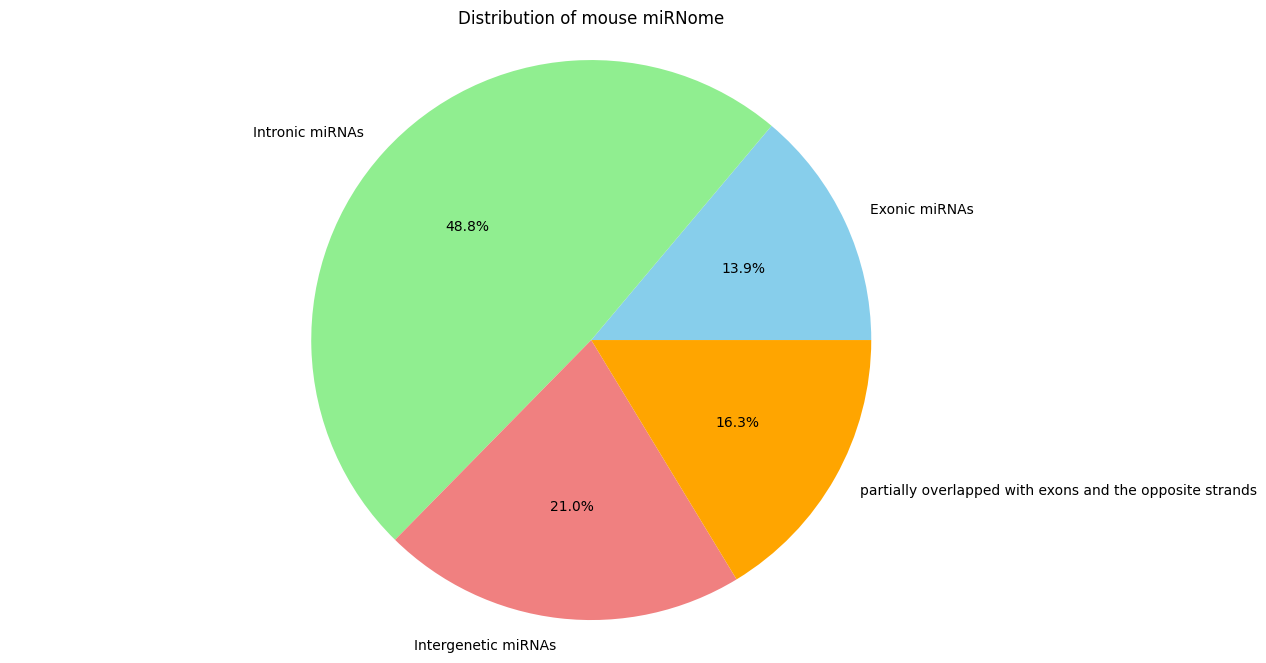

In [97]:
#Mouse miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs', 'Intergenetic miRNAs','partially overlapped with exons and the opposite strands']
sizes = [mm_exonic['Count'], mm_intronic['Count'],mm_no_hostmRNA['Count'],mm_partexons['Count']]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse miRNome')
plt.savefig('Distribution of mouse miRNome.eps')
plt.show()

### Mouse

In [99]:
from EXONIC import Regions

importing Jupyter notebook from EXONIC.ipynb


In [100]:
all_exonic_mouse_exonic_miR=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv')

In [101]:
all_exonic_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','gene_type'])

In [103]:
all_exonic_mouse_exonic_miR.df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(all_host_genes)_NCBI_no_loc.csv',index=False)
all_exonic_mouse_exonic_miR.df.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(all_host_genes)_NCBI_no_loc.xlsx',index=False)
#### without the genomic coordinates

In [104]:
finalized_mouse_exonic_miR=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv')

In [105]:
finalized_mouse_exonic_miR.select_coding()#### select protein-coding genes

In [106]:
finalized_mouse_exonic_miR.add_region()
#### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [107]:
finalized_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','region','gene_type'])

In [108]:
finalized_mouse_exonic_miR.df.head(10)

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
10,XM_030248982.1,Strbp,-,mmu-mir-5128,-,5'UTR,protein-coding gene
11,NM_010434.2,Hipk3,-,mmu-mir-1902,-,3'UTR,protein-coding gene
12,NM_001145824.1,Hipk3,-,mmu-mir-1902,-,3'UTR,protein-coding gene
13,XM_006500575.3,Lama5,-,mmu-mir-7005,-,CDS,protein-coding gene
16,XM_011239023.3,Gad2,+,mmu-mir-3967,+,3'UTR,protein-coding gene
17,XM_006498476.4,Cercam,+,mmu-mir-219b,+,5'UTR,protein-coding gene
19,NM_001004174.2,AA467197,+,mmu-mir-147,+,3'UTR,protein-coding gene
21,NM_001355516.1,Rps21,+,mmu-mir-3091,+,5'UTR,protein-coding gene
23,NM_001289701.1,Pde4dip,-,mmu-mir-7225,-,3'UTR,protein-coding gene
24,NM_001039376.2,Pde4dip,-,mmu-mir-7225,-,3'UTR,protein-coding gene


In [109]:
finalized_mouse_exonic_miR.df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI.csv',index=False)
finalized_mouse_exonic_miR.df.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)

In [111]:
finalized_mouse_exonic_miR_new=finalized_mouse_exonic_miR.df.drop_duplicates(subset=['miR_name'])

In [112]:
finalized_mouse_exonic_miR_new.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv',index=False)
finalized_mouse_exonic_miR_new.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.xlsx',index=False)

### Plot

### Mouse

In [113]:
### save it as a csv file for the unique list of miRNAs
mouse_exonicmiR_df_new=mouse_exonicmiR_df.drop_duplicates(subset=['miR_name'])
mouse_exonicmiR_df_new.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI_unique.csv',index=False)
mouse_exonicmiR_df_new.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [124]:
mouse_exonicmiR_df_new.shape

(170, 16)

In [125]:
mouse_exonicmiR_coding_df=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv')

In [126]:
mouse_exonicmiR_coding_df.df.shape

(83, 7)

In [127]:
mouse_exonicmiR_coding_df.df.head()

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
0,XM_030248982.1,Strbp,-,mmu-mir-5128,-,5'UTR,protein-coding gene
1,NM_010434.2,Hipk3,-,mmu-mir-1902,-,3'UTR,protein-coding gene
2,XM_006500575.3,Lama5,-,mmu-mir-7005,-,CDS,protein-coding gene
3,XM_011239023.3,Gad2,+,mmu-mir-3967,+,3'UTR,protein-coding gene
4,XM_006498476.4,Cercam,+,mmu-mir-219b,+,5'UTR,protein-coding gene


In [128]:
mouse_exonic_miR_region=mouse_exonicmiR_coding_df.df.groupby(mouse_exonicmiR_coding_df.df['region']).size().reset_index(name='Mouse')

In [129]:
mouse_exonic_miR_region

,region,Mouse
0,3'UTR,32
1,5'UTR,26
2,CDS,21
3,Span from CDS and 3'UTR,3
4,Span from CDS and 5'UTR,1


In [130]:
mm_exonic_3_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='3\'UTR'].sum()
mm_exonic_5_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='5\'UTR'].sum()
mm_exonic_CDS=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='CDS'].sum()
mm_exonic_3_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 3\'UTR'].sum()
mm_exonic_5_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 5\'UTR'].sum()

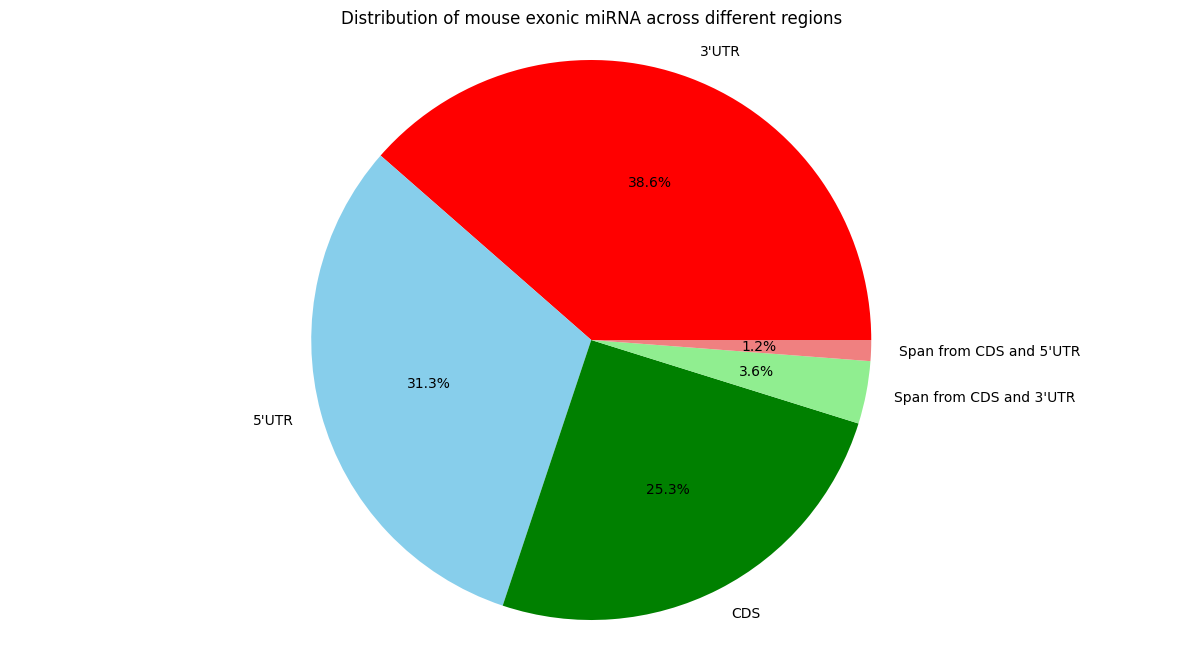

In [131]:
labels = ['3\'UTR', '5\'UTR', 'CDS','Span from CDS and 3\'UTR','Span from CDS and 5\'UTR']
sizes = [mm_exonic_3_UTR['Mouse'], mm_exonic_5_UTR['Mouse'],mm_exonic_CDS['Mouse'],mm_exonic_3_CDS_UTR['Mouse'],mm_exonic_5_CDS_UTR['Mouse']]
colors = ['red', 'skyblue', 'green','lightgreen', 'lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse exonic miRNA across different regions')
plt.savefig('Distribution of mouse exonic miRNA across different regions of the gene.eps')
plt.show()

### Noncoding vs Coding genes(Exonic_PLOT)

### Mouse

In [132]:
mouse_exonicmiR_df.drop_duplicates(subset=['miR_name'],inplace=True)

In [133]:
mouse_exonicmiR_df.shape

(170, 16)

In [134]:
mm_miR_gene_type=mouse_exonicmiR_df.groupby(mouse_exonicmiR_df['gene_type']).size().reset_index(name='Count')

In [135]:
mm_miR_gene_type

,gene_type,Count
0,non-coding gene,90
1,protein-coding gene,80


In [137]:
mm_exonic_proteincoding=mm_miR_gene_type[mm_miR_gene_type['gene_type']=='protein-coding gene'].sum()
mm_exonic_noncoding=mm_miR_gene_type[mm_miR_gene_type['gene_type']=='non-coding gene'].sum()

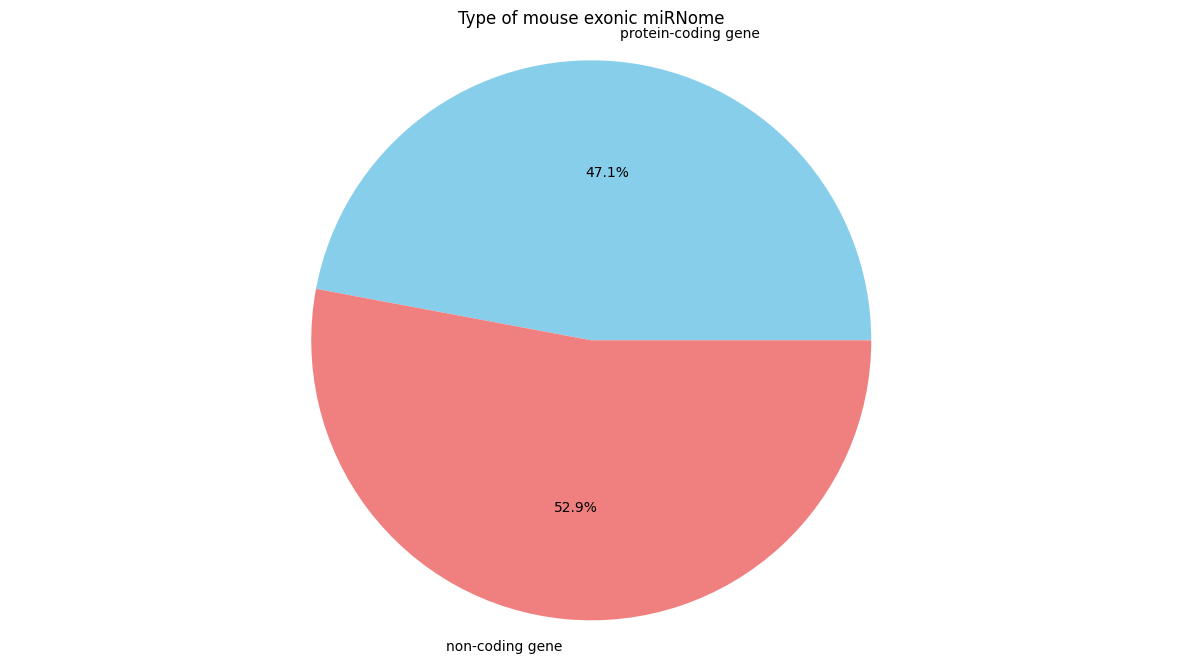

In [138]:
#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_exonic_proteincoding['Count'], mm_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse exonic miRNome')
plt.savefig('Type of mouse exonic miRNome.eps')
plt.show()

### Noncoding vs Coding genes(Intronic_PLOT)

### Mouse

In [139]:
mouse_intronicmiR_df_gene_type=mouse_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [140]:
mm_miR_intronic_gene_type=mouse_intronicmiR_df.groupby(mouse_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [141]:
mm_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,89
1,protein-coding gene,510


In [142]:
mm_intronic_proteincoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
mm_intronic_noncoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

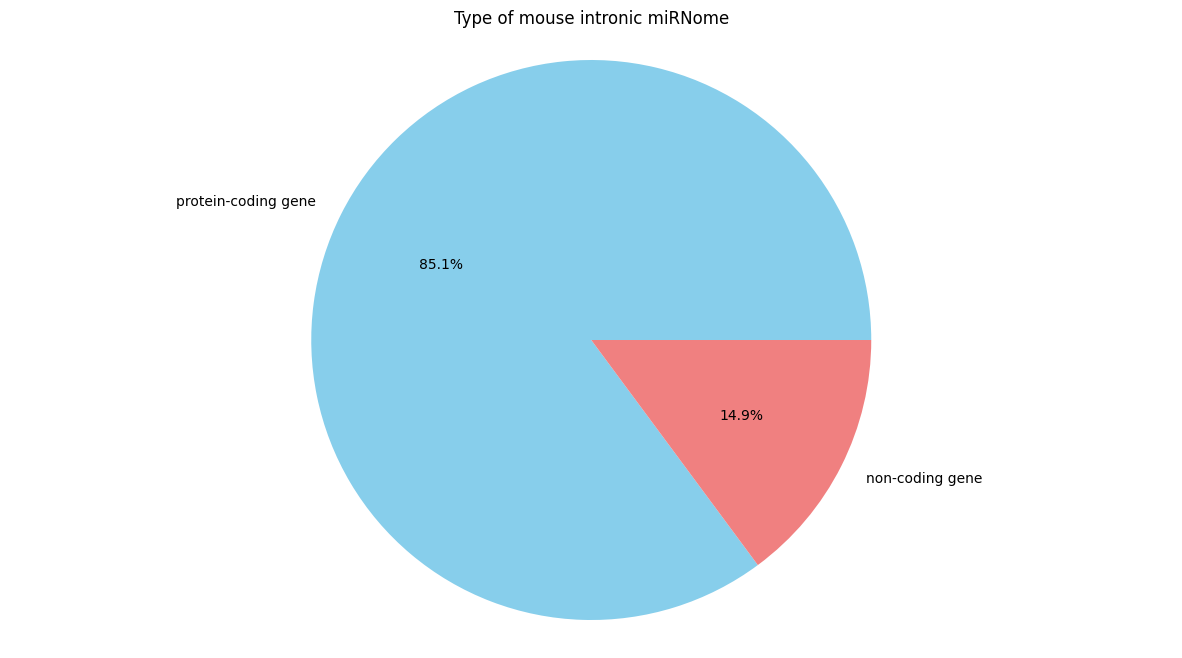

In [143]:
###Intronic
#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_intronic_proteincoding['Count'], mm_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intronic miRNome')
plt.savefig('Type of mouse intronic miRNome.eps')
plt.show()